# 次元 Data の整理

#### Data を掴む方法
1. 平均や分散といった数値の指標によって Data を要約する。
2. 図示することで視覚的に Data を俯瞰する

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
from IPython.display import display

# Jupyter Notebook の出力を小数点以下３桁に抑える
%precision 3
# DataFrame の出力を小数点以下３桁に抑える
pd.options.display.precision = 3

In [2]:
# # Sample Data を Download する
# !wget -O ../data/ch2_scores_em.csv https://raw.githubusercontent.com/ghmagazine/python_stat_sample/master/data/ch2_scores_em.csv

In [3]:
!head -5 ../data/ch2_scores_em.csv

生徒番号,英語,数学
1,42,65
2,69,80
3,56,63
4,41,63


In [4]:
df = pd.read_csv('../data/ch2_scores_em.csv', index_col='生徒番号')
df.head()

,英語,数学
生徒番号,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [5]:
scores = np.array(df['英語'])[:10]
display(scores)

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58])

In [6]:
scores_df = pd.DataFrame({'点数': scores}, index=pd.Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], name='生徒'))
scores_df

,点数
生徒,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


## Data 中心の指標
代表値と呼ばれ、Data を１つの値で要約するならばこれ、といった指標。

### 平均値(mean)
Data 全てを足しあわせて、Data の数で割ることで求まる。


In [7]:
# Python
sum(scores) / len(scores)

55.000

In [8]:
# NumPy
np.mean(scores)

55.000

In [9]:
# DataFrame
print(scores_df.mean())

点数    55.0
dtype: float64


### 中央値(median)
Data を大きさの順に並べたときにちょうど中央に位置する値。
平均値に比べて外れ値に強い。
- Data 数 n が奇数なら、(n+1)/2 番目の Data が中央値
- Data 数 n が偶数なら、n/2+1 番目の Data と n/2+1 の Data の平均が中央値

In [10]:
sorted_scores = np.sort(scores)
display(sorted_scores)

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69])

In [11]:
# Python
n = len(sorted_scores)
if n % 2 == 0:
    m0 = sorted_scores[n//2 - 1]
    m1 = sorted_scores[n//2]
    median = (m0 + m1) / 2
else:
    median = sorted_scores[(n+1)//2 - 1]
display(median)

56.500

In [12]:
# NumPy
np.median(scores)

56.500

In [13]:
# DataFrame
print(scores_df.median())

点数    56.5
dtype: float64


### 最頻値(mode)
Data の中で最も多く出現する値のこと

In [14]:
# DataFrame
print(pd.Series([1, 1, 1, 2, 2, 3]).mode())

0    1
dtype: int64


最頻値は、基本的に質的 Data の代表値を求めるときに使用する使用。
※量的 Data について、全く同じ値が何回もでていることはあまりない。ただし、度数分布表を導入することで、量的 Data についても最頻値を自然に定義できる。

In [15]:
print(pd.Series(range(1, 6)).mode())

0    1
1    2
2    3
3    4
4    5
dtype: int64


## Data のばらつきの指標

### 分散と標準偏差
#### 偏差(deviation)
各 Data が平均からどれだけ離れているかを表す指標。

In [16]:
mean = np.mean(scores)
deviation = scores - mean
display(deviation)

array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

In [17]:
another_scores = [50, 60, 58, 54, 51, 56, 57, 53, 52, 59]
another_mean = np.mean(another_scores)
another_deviation = another_scores - another_mean
display(another_deviation)

array([-5.,  5.,  3., -1., -4.,  1.,  2., -2., -3.,  4.])

偏差の平均は常に０になる

In [18]:
np.mean(deviation)

0.000

In [19]:
np.mean(deviation)

0.000

In [20]:
summary_df = scores_df.copy()
summary_df['偏差'] = deviation
summary_df

,点数,偏差
生徒,,
A,42,-13.0
B,69,14.0
C,56,1.0
D,41,-14.0
E,57,2.0
F,48,-7.0
G,65,10.0
H,49,-6.0
I,65,10.0


In [21]:
print(summary_df.mean())

点数    55.0
偏差     0.0
dtype: float64


#### 分散(variance)
偏差の平均は常に０になってしまうため、偏差の二乗を考える。
その平均として定義される指標が **分散(variance)** になる

In [22]:
np.mean(deviation ** 2)

86.000

In [23]:
# NumPy
np.var(scores)

86.000

In [24]:
# DataFrame
print(scores_df.var())

点数    95.556
dtype: float64


分散には
- 標本分散
- 不偏分散

の２種類ある。

- NumPy は Default で標本分散を計算する。
- Pandas は、Default で不偏分散を計算する。

そのため、計算結果に相違がある。
NumPy, Pandas ともに 引数 `ddof` (delta degree of freedom: デルタの自由度) を常に明示的に指定して計算することが推奨される。
- `ddof=0`: 標本分散
- `ddof=1`: 不偏分散

In [25]:
# 標本分散
np_variance = np.var(scores, ddof=0)
df_variance = scores_df.var(ddof=0)

print(np_variance, df_variance)

86.0 点数    86.0
dtype: float64


In [26]:
# 不偏分散
np_variance = np.var(scores, ddof=1)
df_variance = scores_df.var(ddof=1)

print(np_variance, df_variance)

95.55555555555556 点数    95.556
dtype: float64


In [27]:
summary_df['偏差二乗'] = np.square(deviation)
summary_df

,点数,偏差,偏差二乗
生徒,,,
A,42,-13.0,169.0
B,69,14.0,196.0
C,56,1.0,1.0
D,41,-14.0,196.0
E,57,2.0,4.0
F,48,-7.0,49.0
G,65,10.0,100.0
H,49,-6.0,36.0
I,65,10.0,100.0


In [28]:
print(summary_df.mean())

点数      55.0
偏差       0.0
偏差二乗    86.0
dtype: float64


#### 標準偏差(standard deviation)
もとの Data と同じ単位を持ったばらつきの指標として分散の root をとった **標準偏差(standard deviation)** が使われる

In [29]:
np.sqrt(np.var(scores, ddof=0))

9.274

In [30]:
# NumPy
np.std(scores, ddof=0)

9.274

- 平均±標準偏差の区間: １シグマ区間
- 平均±２標準偏差んの区間: ２シグマ区間
- 平均±３標準偏差んの区間：３シグマ区間

と呼ぶ

### 範囲と四分位範囲

#### 範囲（range）
Data 全体を見るのではなく、Data の最大値と最小値だけでばらつきを表現する方法。
最大値と最小値の差が大きければばらつきが大きく、差が小さければばらつきも小さい、と考える。
簡単に計算できるが大雑把な指標になり、外れ値に弱い

In [31]:
np.max(scores) - np.min(scores)

28

#### 四分位範囲（inter quartile range）
Data の下位25%、50%、75%に位置する値に注目する。それらを第１四分位点、第２四分位点、第３四分位点といい Q1, Q2, Q3 で表す。
そして、 Q3 - Q1 を四分位範囲 IQR として定義する。

In [32]:
scores_Q1 = np.percentile(scores, 25)
scores_Q3 = np.percentile(scores, 75)
scores_IQR = scores_Q3 - scores_Q1
display(scores_IQR)

15.000

Q2 は中央値に一致する。
分散は平均に対して定義されるばらつきの指標。IQR は中央値に対して定義されるばらつきの指標と解釈できる。

### Data の指標まとめ
DataFrame や Series には `describe` という、ここまで扱ってきた指標を一度に求める Method がある。
Data が与えられたら、とりあえず `describe` を使用して大雑把に概要をつかんでみるといいかもしれない。

In [33]:
print(pd.Series(scores).describe())

count    10.000
mean     55.000
std       9.775
min      41.000
25%      48.250
50%      56.500
75%      63.250
max      69.000
dtype: float64


## Data の正規化
平均や分散に依存せずに Data の相対的な位置関係がわかる指標があると便利。
Data を統一的な指標に変化することを **正規化（normalization）** という。
正規化はさまざまな Data を同じように扱うことができるため、Data を解釈するときの常套手段になっている。

### 標準化（standardization）
Data から平均を引き、標準偏差で割る操作。
標準化された Data を
- 基準化変量（standardized data）
- z-score

という。

In [34]:
z = (scores - np.mean(scores)) / np.std(scores, ddof=0)
display(z)

array([-1.402,  1.51 ,  0.108, -1.51 ,  0.216, -0.755,  1.078, -0.647,
        1.078,  0.323])

標準化された Data は平均が 0 で標準偏差が１になる

In [35]:
np.mean(z), np.std(z, ddof=0)

(-0.000, 1.000)

標準化された Data は単位をもたないことに注意する

### 偏差値
平均が50、標準偏差が10になるように正規化した値のこと

In [36]:
z = 50 + 10 * (scores - np.mean(scores)) / np.std(scores, ddof=0)
display(z)

array([35.982, 65.097, 51.078, 34.903, 52.157, 42.452, 60.783, 43.53 ,
       60.783, 53.235])

In [37]:
scores_df['偏差値'] = z
scores_df

,点数,偏差値
生徒,,
A,42,35.982
B,69,65.097
C,56,51.078
D,41,34.903
E,57,52.157
F,48,42.452
G,65,60.783
H,49,43.530
I,65,60.783


## １次元 Data の視覚化
はじめに50人分の英語の点数の `array` を作り、 `Series` の `describe` method を使い主な指標について確認しておく。

In [38]:
# 50人分の英語の点数の array
english_scores = np.array(df['英語'])
# Series に変換して describe を表示
display(pd.Series(english_scores).describe())

count    50.00
mean     58.38
std       9.80
min      37.00
25%      54.00
50%      57.50
75%      65.00
max      79.00
dtype: float64

### 度数分布表
Data をとる値をいくつかの区間に分けて、各区間にいくつの Data が分類されるかを数える方法。
分割した区間と Data 数を表にまとめたもの。

- 階級（class）: ある値で区切った区間のこと
- 度数（frequency）: 各階級に属している値の数
- 階級幅: 各区間（階級)の幅のこと
- 階級数: 階級の数のこと

#### `np.histogram` 関数

引数:
- bins: 階級数(int)
- range: 最小値と最大値(tuple)

In [39]:
freq, _ = np.histogram(english_scores, bins=10, range=(0, 100))
display(freq)

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0])

`DataFrame` に結果をまとめていく

In [40]:
# 0~10 , 10~20, ... といった文字列の List をつくる
freq_class = [f'{i}~{i+10}' for i in range(0, 100, 10)]
# freq_class を Index にして freq で DataFrame をつくる
freq_dist_df = pd.DataFrame({'度数': freq}, index=pd.Index(freq_class, name='階級'))

freq_dist_df

,度数
階級,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


Data を度数分布表にまとめることで点数の分布がわかりやすくなった。
- 多くの生徒は50~70点だった
- 高得点も低得点もないあまり差がつかない Test だった

度数分布表によく使用される階級値、相対度数、累積相対度数、といった値を加えていく。

In [41]:
# 階級値（各階級を代表する値のこと。階級の中央の値が使われる。）
class_value = [(i+(i+10))//2 for i in range(0, 100, 10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [42]:
# 相対度数（全 Data に対してその階級の Data がどのくらいの割合を占めているかを示す）
rel_freq = freq / freq.sum()
display(rel_freq)

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

In [43]:
# 累積相対度数（その階級までの相対度数の和を示す。）
cum_rel_freq = np.cumsum(rel_freq)
display(cum_rel_freq)

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [44]:
freq_dist_df['階級値'] = class_value
freq_dist_df['相対度数'] = rel_freq
freq_dist_df['累積相対度数'] = cum_rel_freq
freq_dist_df = freq_dist_df[['階級値', '度数', '相対度数', '累積相対度数']]

freq_dist_df

,階級値,度数,相対度数,累積相対度数
階級,,,,
0~10,5,0,0.00,0.00
10~20,15,0,0.00,0.00
20~30,25,0,0.00,0.00
30~40,35,2,0.04,0.04
40~50,45,8,0.16,0.20
50~60,55,16,0.32,0.52
60~70,65,18,0.36,0.88
70~80,75,6,0.12,1.00
80~90,85,0,0.00,1.00


- 相対度数から全生徒の68%が50~70点
- 累積相対度数から全生徒の約半分は60点以下

ということが一目でわかるようになった。

### 最頻値ふたたび
度数分布表が完成したことで量的 Data に対しても自然に最頻値を求めることができる。
度数が最大となる階級の階級値で定義される。

In [45]:
freq_dist_df.loc[freq_dist_df['度数'].idxmax(), '階級値']

65

！注意点: 最頻値は度数分布表の作り方に依存する。

### ヒストグラム（Histogram）
度数分布表を棒 Graph で表したもの。
Histogram を使うことで Data の分布の形状をより視覚的につかむことができる。

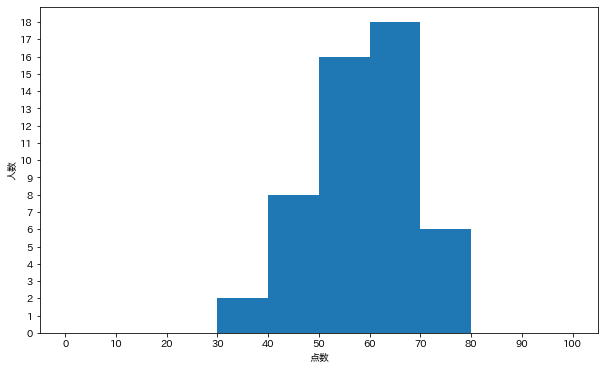

In [46]:
# Campus を作る
# figsize で横・幅の大きさを指定
fig = plt.figure(figsize=(10, 6))
# Campus 上に Graph を描画するための領域を作る
# 引数は領域を１ｘ１個作り、１つめの領域に描画することを意味する
ax = fig.add_subplot(111)

# 階級値を 10 にして Histogram を描画
freq, _, _ = ax.hist(english_scores, bins=10, range=(0, 100))
# Ｘ軸に Label をつける
ax.set_xlabel('点数')
# Ｙ軸に Label をつける
ax.set_ylabel('人数')
# Ｘ軸に 0, 10, 20, ..., 100 の目盛りをふる
ax.set_xticks(np.linspace(0, 100, 10+1))
# Ｙ軸に 0, 1, 2, ... の目盛りをふる
ax.set_yticks(np.arange(0, freq.max()+1))
# Graph の表示
plt.show()

階級値を10に指定して Histogram を作成したが階級値を増やすことでより細かく Data の分布を見ることができる。
階級値を25（=階級幅４点）にして Histogram を出力する

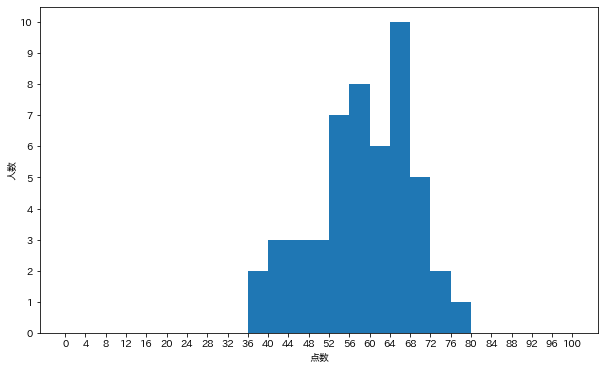

In [47]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

freq, _, _ = ax.hist(english_scores, bins=25, range=(0, 100))
ax.set_xlabel('点数')
ax.set_ylabel('人数')
ax.set_xticks(np.linspace(0, 100, 25+1))
ax.set_yticks(np.arange(0, freq.max()+1))
plt.show()

階級幅を変えることで、Histogram の見た目が大きく変わった。
※度数分布表や Histogram は階級値によって形状が大きく変わる為、Data によって適切な値に設定することが大切になる。

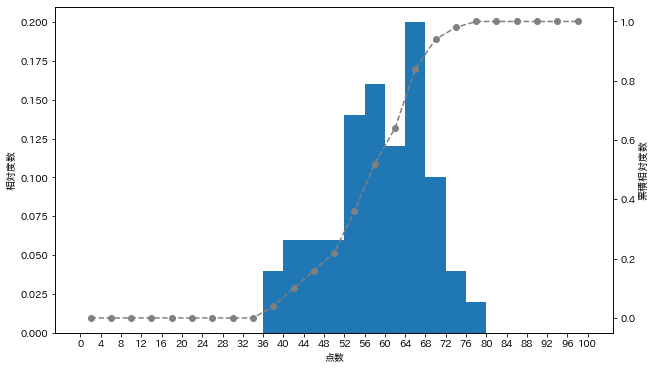

In [48]:
# 相対度数の Histogram を 累積相対度数の折れ線 Graph と一緒に描画する
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111)
# Ｙ軸の Scale が違う Graph を ax1 と同じ領域上に書けるようにする
ax2 = ax1.twinx()

# 相対度数の Histogram にするためには、度数を Data の数で割る必要がある
# これは hist の引数 weight を指定することで実現できる
weights = np.ones_like(english_scores) / len(english_scores)
rel_freq, _, _ = ax1.hist(english_scores, bins=25, range=(0, 100), weights=weights)
cum_rel_freq = np.cumsum(rel_freq)
class_value = [(i+(i+4))//2 for i in range(0, 100, 4)]
# 折れ線 Graph 描画
# 引数 ls を '--' にすることで線が点線に
# 引数 marker を 'o' にすることで Data 点を丸に
# 引数 color を 'gray' にすることで灰色に
ax2.plot(class_value, cum_rel_freq, ls='--', marker='o', color='gray')
# 折れ線 Graph の罫線を消去
ax2.grid(visible=False)

ax1.set_xlabel('点数')
ax1.set_ylabel('相対度数')
ax2.set_ylabel('累積相対度数')
ax1.set_xticks(np.linspace(0, 100, 25+1))

plt.show()

## 箱ひげ図(box plot)
- Data のばらつきを表現するための図
- Data の分布や外れ値を視覚的につかめる
- 四分位範囲の Q1, Q2, Q3, IQR を使用する
- 箱は Q1 から Q3 を、ひげは Q1 - 1.5IQR から Q3 + 1.5IQR を表し、そこい入りきらなかった Data は外れ値になる

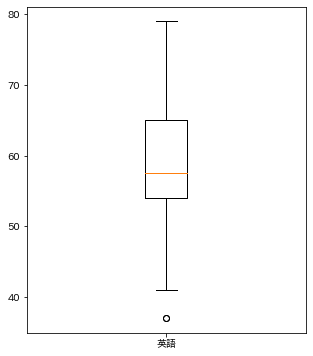

In [49]:
fig = plt.figure(figsize=(5, 6))
ax = fig.add_subplot(111)
ax.boxplot(english_scores, labels=['英語'])

plt.show()

箱ひげ図からも Test は60点前後の人が多いことがわかる。